In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [322]:
#import yfinance as yf

# Download historical data for a stock (e.g., Apple)
#ticker = yf.Ticker("AAPL")
#df = ticker.history(start="2024-01-01", end="2025-04-22")

#print(data)

In [324]:
# Convert 'Date' column to DateTime format
#df["Date"] = pd.to_datetime(df["Date"])

# Set 'Date' as index
#df.set_index("Date", inplace=True)

# Convert index to formatted date (YYYY-MM-DD)
#df.index = df.index.strftime('%Y-%m-%d')

# Print first record to verify
#print(df.iloc[0])

In [326]:
# Drop the first row of the DataFrame
#df = df.iloc[1:]

# Reset the index to maintain continuity
#df.reset_index(inplace=True)
#print(df.head())

In [328]:
#df.drop(columns=["Dividends", "Stock Splits"], inplace=True)

In [ ]:
# Drop the first row of the DataFrame
#df = df.iloc[1:]
# Reset the index to maintain continuity
#df.reset_index(inplace=True)
#df.head()

In [332]:
#df = df.iloc[::-1]  # Reverses the rows of the DataFrame
#print(df.head())  # Preview the reversed DataFrame

In [ ]:
df= pd.read_csv("MSFT_realtime.csv")
df.head()

,Date,Open,High,Low,Close,Volume
0,31-12-2024,426.10,426.73,420.66,421.50,13246509
1,30-12-2024,426.06,427.55,421.90,424.83,13158703
2,27-12-2024,434.60,435.22,426.35,430.53,18117713
3,26-12-2024,439.08,440.94,436.63,438.11,8199927
4,24-12-2024,434.65,439.60,434.19,439.33,7164543


In [280]:
df = df.round(2)
df

,Date,Open,High,Low,Close,Volume
323,2025-04-21,193.27,193.80,189.81,193.16,46663300
322,2025-04-17,197.20,198.83,194.42,196.98,51334300
321,2025-04-16,198.36,200.70,192.37,194.27,59732400
320,2025-04-15,201.86,203.51,199.80,202.14,51343900
319,2025-04-14,211.44,212.94,201.16,202.52,101352900
...,...,...,...,...,...,...
4,2024-01-10,183.25,185.29,182.82,185.08,46792900
3,2024-01-09,182.82,184.04,181.64,184.04,42841800
2,2024-01-08,181.00,184.49,180.42,184.45,59144500
1,2024-01-05,180.90,181.67,179.09,180.10,62303300


In [282]:
df.describe()

,Open,High,Low,Close,Volume
count,324.000000,324.000000,324.000000,324.000000,3.240000e+02
mean,210.676358,212.997654,208.614599,210.937994,5.777803e+07
std,25.189493,25.328397,24.944106,25.240219,3.052113e+07
min,164.570000,165.620000,163.310000,164.220000,2.323470e+07
25%,186.835000,188.927500,185.427500,186.890000,4.163318e+07
50%,219.680000,221.985000,216.990000,220.275000,4.986030e+07
75%,229.295000,231.672500,227.140000,229.102500,6.334285e+07
max,257.910000,259.810000,257.350000,258.740000,3.186799e+08


In [284]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 323 to 0
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    324 non-null    object 
 1   Open    324 non-null    float64
 2   High    324 non-null    float64
 3   Low     324 non-null    float64
 4   Close   324 non-null    float64
 5   Volume  324 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 15.3+ KB


In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format="%d-%m-%Y")

# Extract the day, month, and year from the 'Date' column
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

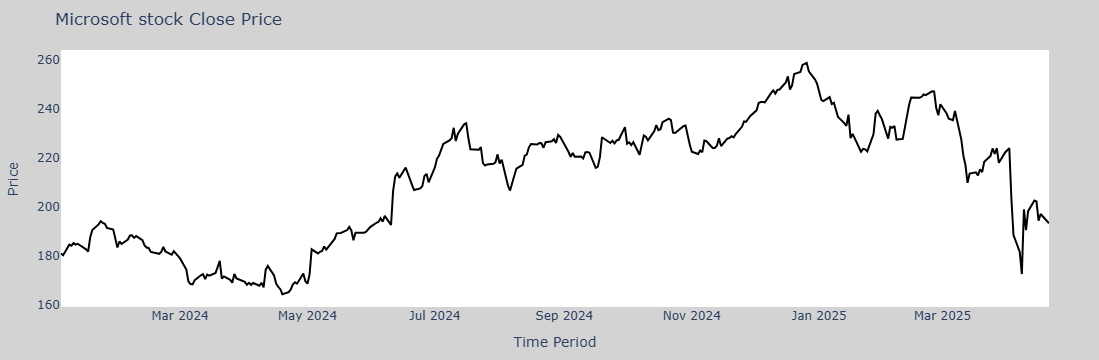

In [ ]:
import plotly.graph_objects as go

# Create the Plotly figure
fig = go.Figure()

# Add the Close Price line with a custom color
fig.add_trace(go.Scatter(x=df['Date'], y=df['Close'], mode='lines', name='Close Price', line=dict(color='black')))

fig.update_layout(
    title='Microsoft stock Close Price',
    xaxis=dict(
        title='Time Period',
        categoryorder='array',
        categoryarray=df['Date'],  # Set the x-axis to show dates in the correct order
        showgrid=False  # Remove x-axis grid
    ),
    yaxis=dict(
        title='Price',
        showgrid=False  # Remove y-axis grid
    ),
    hovermode='x unified',
    plot_bgcolor='white',  # Set background color to white
    margin=dict(l=50, r=50, t=50, b=50),  # Add margins for space
    paper_bgcolor='lightgrey',  # Set the background color of the chart with a border effect
)

# Show the plot
fig.show()

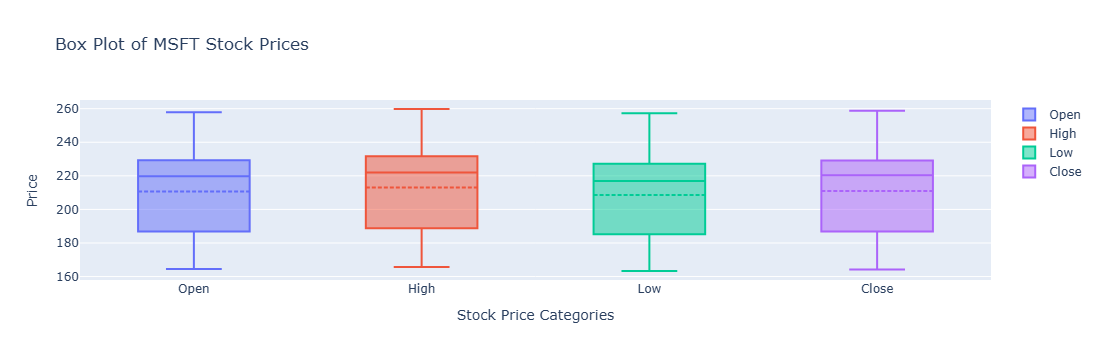

In [294]:
# Create the box plot
fig = go.Figure()

# Add the box plot for each column
fig.add_trace(go.Box(y=df['Open'], name='Open', boxmean=True))
fig.add_trace(go.Box(y=df['High'], name='High', boxmean=True))
fig.add_trace(go.Box(y=df['Low'], name='Low', boxmean=True))
fig.add_trace(go.Box(y=df['Close'], name='Close', boxmean=True))

fig.update_layout(
    title='Box Plot of MSFT Stock Prices',
    xaxis_title='Stock Price Categories',
    yaxis_title='Price',
    hovermode='closest' 
)

# Show the figure
fig.show()


In [296]:
df['is_quarter_end'] = np.where(df['Month']%3==0,1,0)
df['is_quarter_end'].value_counts()

is_quarter_end
0    223
1    101
Name: count, dtype: int64

In [298]:
df['open-close'] = df['Open'] - df['Close']
df['low-high'] = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

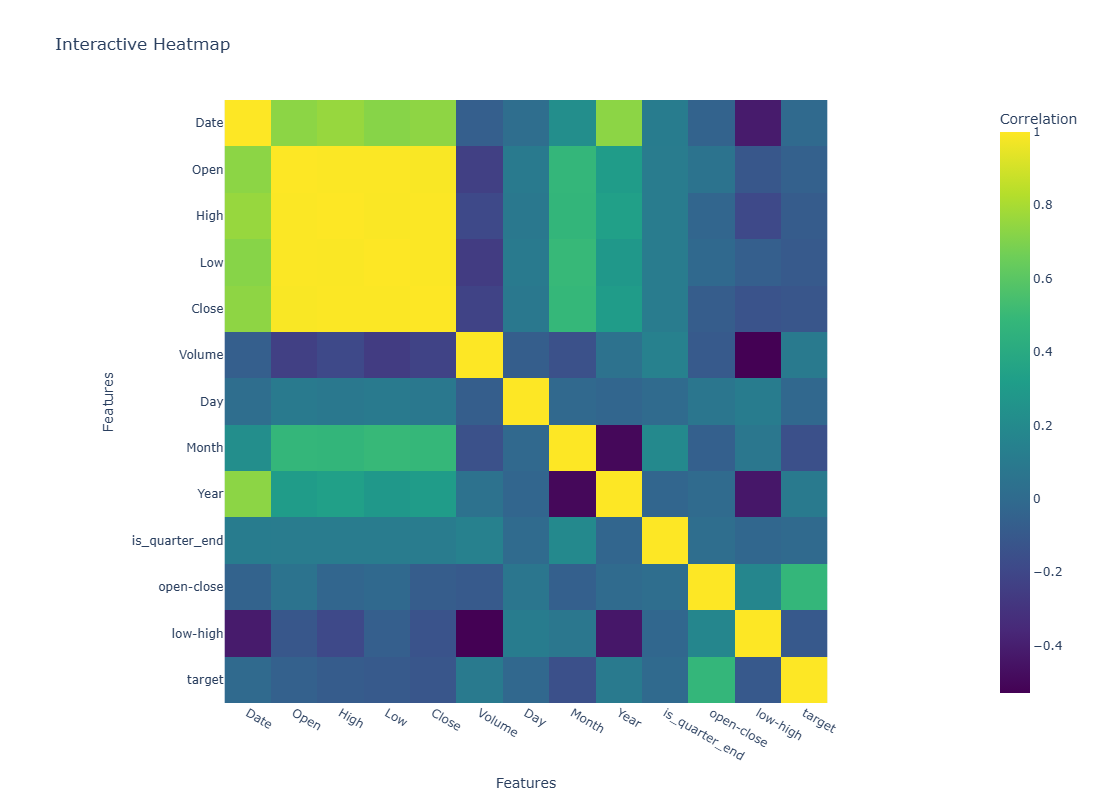

In [300]:
import plotly.express as px

# Compute the correlation matrix excluding the 'Date' column
corr_matrix = df.corr()

# Create an interactive heatmap with Plotly
fig = px.imshow(
    corr_matrix,
    color_continuous_scale='Viridis',
    title='Interactive Heatmap',
    labels=dict(x="Features", y="Features", color="Correlation"),
    width=1000,
    height=800  
)
# Show the interactive heatmap
fig.show()

In [302]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [304]:
features = ['open-close', 'low-high', 'is_quarter_end']  # Adjust features as needed
target = 'target'  # Your target variable

# Split into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(df[features], df[target], test_size=0.35, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [306]:
from sklearn.linear_model import LogisticRegression

models = LogisticRegression()
models.fit(X_train, Y_train)

LogisticRegression()

In [308]:
Y_pred = models.predict(X_test)

print(f"Accuracy: {accuracy_score(Y_test, Y_pred):.2%}")
print(classification_report(Y_test, Y_pred))

Accuracy: 78.07%
              precision    recall  f1-score   support

           0       0.78      0.87      0.82        67
           1       0.78      0.66      0.71        47

    accuracy                           0.78       114
   macro avg       0.78      0.76      0.77       114
weighted avg       0.78      0.78      0.78       114



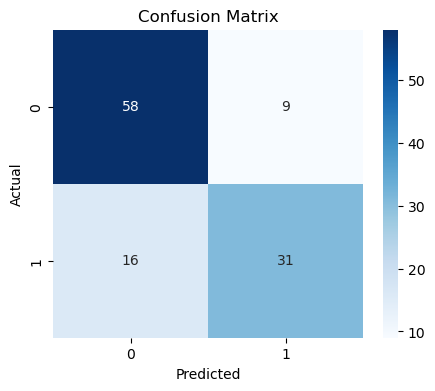

In [310]:
from sklearn.metrics import confusion_matrix

# Assuming Y_test and Y_pred are already defined
cm = confusion_matrix(Y_test, Y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [312]:
from sklearn.svm import SVC

model = SVC(kernel='rbf', C=2.0, random_state=42)  # Initialize the SVM classifier
model.fit(X_train, Y_train)  

Y_pred = model.predict(X_test)

print(f"Accuracy: {accuracy_score(Y_test, Y_pred):.2%}")
print(classification_report(Y_test, Y_pred))

Accuracy: 79.82%
              precision    recall  f1-score   support

           0       0.81      0.87      0.83        67
           1       0.79      0.70      0.74        47

    accuracy                           0.80       114
   macro avg       0.80      0.78      0.79       114
weighted avg       0.80      0.80      0.80       114



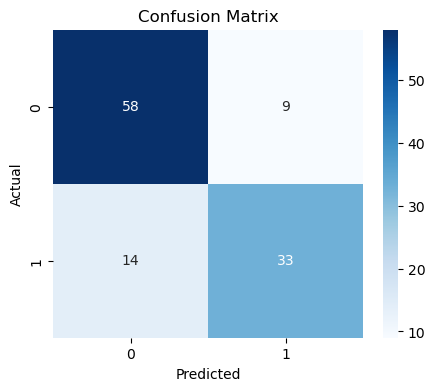

In [314]:
from sklearn.metrics import confusion_matrix

# Assuming Y_test and Y_pred are already defined
cm = confusion_matrix(Y_test, Y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [316]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=5) 
model.fit(X_train, Y_train)  

Y_pred = models.predict(X_test)

print(f"Accuracy: {accuracy_score(Y_test, Y_pred):.2%}")
print(classification_report(Y_test, Y_pred))

Accuracy: 78.07%
              precision    recall  f1-score   support

           0       0.78      0.87      0.82        67
           1       0.78      0.66      0.71        47

    accuracy                           0.78       114
   macro avg       0.78      0.76      0.77       114
weighted avg       0.78      0.78      0.78       114



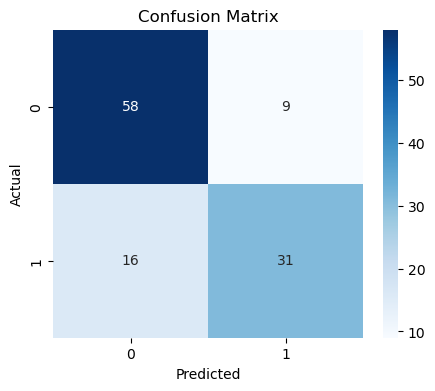

In [318]:
from sklearn.metrics import confusion_matrix

# Assuming Y_test and Y_pred are already defined
cm = confusion_matrix(Y_test, Y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

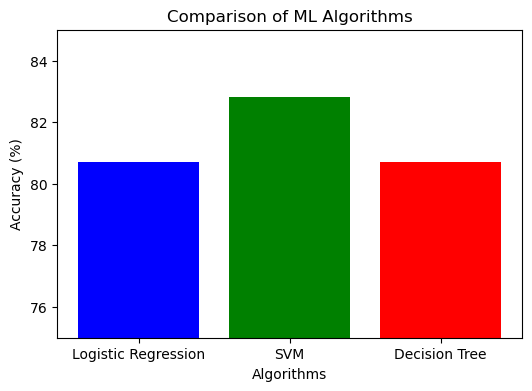

In [320]:
# Accuracy values from your models
accuracy_scores = {
    "Logistic Regression": 80.70,
    "SVM": 82.82,
    "Decision Tree": 80.70
}

# Creating the bar plot
plt.figure(figsize=(6,4))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color=['blue', 'green', 'red'])
plt.xlabel("Algorithms")
plt.ylabel("Accuracy (%)")
plt.title("Comparison of ML Algorithms")
plt.ylim(75, 85)
plt.show()

In [61]:
        open_val = float(input("Enter Open value: "))
        high = float(input("Enter High value: "))
        low = float(input("Enter Low value: "))
        close = float(input("Enter Close value: "))
        is_quarter_end = int(input("Is it quarter end? (1 for Yes, 0 for No): "))

        # Creating the test data as a DataFrame
        input_data = {
            'low-high': [low - high],
            'open-close': [open_val - close],
            'is_quarter_end': [is_quarter_end]
        }
        test_data = pd.DataFrame(input_data)

Enter Open value:  23
Enter High value:  23
Enter Low value:  56
Enter Close value:  43
Is it quarter end? (1 for Yes, 0 for No):  0


In [65]:
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
test_data = scaler.transform(test_data)

In [67]:
Y_pred = model.predict(test_data)  # Predict the test set
# Interpret the prediction
if Y_pred[0] == 0:
    print("Prediction: Stock is predicted to go DOWN.")
else:
    print("Prediction: Stock is predicted to go UP.")

Prediction: Stock is predicted to go UP.
